In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def func(x):
  return np.square(x+5)

def dfunc(x):
  return 2*(x+5)

def GD(w_init,df,epochs, lr):
  xs=np.zeros(epochs+1)
  x=w_init
  xs[0]=x
  for i in range(epochs):
    dx=df(x)
    v=-dx*lr
    x+=v
    xs[i+1]=x
  return xs

w_init=3
epochs=20
lr=0.3
x=GD(w_init,dfunc,epochs,lr=lr)
print(x)

[ 3.         -1.8        -3.72       -4.488      -4.7952     -4.91808
 -4.967232   -4.9868928  -4.99475712 -4.99790285 -4.99916114 -4.99966446
 -4.99986578 -4.99994631 -4.99997853 -4.99999141 -4.99999656 -4.99999863
 -4.99999945 -4.99999978 -4.99999991]


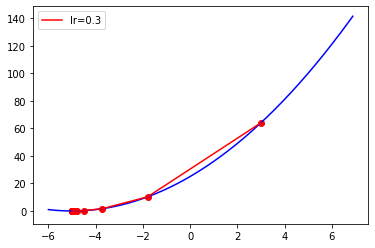

In [12]:
color='r'
from numpy import arange

t=arange(-6.0,6.9,0.01)
plt.plot(t,func(t),c='b')
plt.plot(x,func(x),c=color,label='lr={}'.format(lr))
plt.scatter(x,func(x),c=color,)
plt.legend()
plt.show()

In [13]:
line_x=np.linspace(-5,5,100)
line_y=func(line_x)
plt.figure('Gradient Descent: Learning Rate')

w_init=3
epochs=5
x=w_init
lr=[0.001,0.01,0.1]


<Figure size 432x288 with 0 Axes>

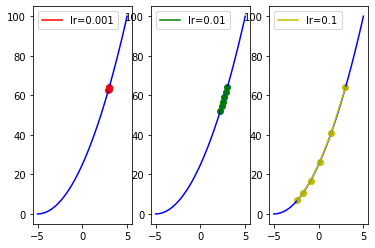

In [17]:
color=['r','g','y']
size=np.ones(epochs+1)*10
size[-1]=70

for i in range(len(lr)):
  x=GD(w_init,dfunc,epochs,lr=lr[i])
  plt.subplot(1,3,i+1)
  plt.plot(line_x,line_y,c='b')
  plt.plot(x,func(x),c=color[i],label='lr={}'.format(lr[i]))
  plt.scatter(x,func(x),c=color[i])
  plt.legend()

plt.show()

In [0]:
def GD_decay(w_init,df,epochs,lr,decay):
  xs=np.zeros(epochs+1)
  x=w_init
  xs[0]=x
  v=0
  for i in range(epochs):
    dx=df(x)
    lr_i=lr*1.0/(1.0+decay*1)
    v=-dx*lr_i
    x+=v
    xs[i+1]=x
  return xs

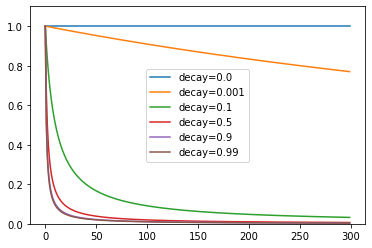

In [19]:
line_x=np.linspace(-5,5,100)
line_y=func(line_x)
plt.figure('Grandient Descent: Decay')

lr=1.0
iterations=np.arange(300)
decay=[0.0,0.001,0.1,0.5,0.9,0.99]

for i in range(len(decay)):
  decay_lr=lr*(1.0/(1.0+decay[i]*iterations))
  plt.plot(iterations,decay_lr,label='decay={}'.format(decay[i]))

plt.ylim([0,1.1])
plt.legend(loc='best')
plt.show()

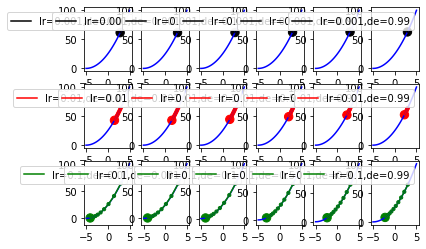

In [22]:
line_x=np.linspace(-5,5,100)
line_y=func(line_x)
plt.figure('Gradient Desent: Decay')

x=w_init
epochs=10

x_start=x
lr=[0.001,0.01,0.1]
decay=[0.0,0.001,0.1,0.5,0.9,0.99]

color=['k','r','g','y']

row=len(lr)
col=len(decay)
size=np.ones(epochs+1)*10
size[-1]=70

for i in range(row):
  for j in range(col):
    x=GD_decay(x_start,dfunc,epochs,lr=lr[i],decay=decay[j])
    plt.subplot(row,col,i*col+j+1)
    plt.plot(line_x,line_y,c='b')
    plt.plot(x,func(x),c=color[i],label='lr={},de={}'.format(lr[i],decay[j]))
    plt.scatter(x,func(x),c=color[i],s=size)
    plt.legend(loc=0)
  
plt.show()